In [1]:
import pandas as pd
import numpy as np


In [2]:
archivo = 'csv_creados/df_infl_tva.csv'
df_infl_tva = pd.read_csv(archivo)

In [3]:
archivo = 'csv_creados/df_infl.csv'
df_infl = pd.read_csv(archivo)

In [4]:
df_infl.head(2) # Datos en términos absolutos

,Año,divisa,M0,M1,M2,M3,GDP (current LCU),CPI (Base Year 2016),GDP (constant LCU),Velocity of M0,Velocity of M1,Velocity of M2,Velocity of M3
0,1960-12-31,Pesos,0.014366,0.021707,0.026134,0.027830,0.131509,6.172503e-12,182932009390,9.154331,6.058445,5.032156,4.725354
1,1961-12-31,Pesos,0.014144,0.024082,0.029302,0.031751,0.166807,7.426182e-12,192861271430,11.793678,6.926671,5.692713,5.253627


In [5]:
df_infl_tva.head(2) # Datos en términos relativos

,Año,Divisa,M0_gr,M1_gr,M2_gr,M3_gr,GDP_gr,Inflation Rate,GDP_Real_gr,Velocity M0_gr,Velocity M1_gr,Velocity M2_gr,Velocity M3_gr
0,1961-12-31,Pesos,-0.015452,0.109421,0.121229,0.140866,0.268410,0.203107,0.054278,0.288317,0.143308,0.131267,0.111796
1,1962-12-31,Pesos,0.080916,0.008348,0.034162,0.043666,0.277738,0.288718,-0.008520,0.182088,0.267160,0.235530,0.224279


#### Vamos a estudiar cómo ha sido el crecimiento de las variables GDP_real y Velocity M2

In [6]:
df_infl_tva['GDP_Real_gr'].describe()

count    63.000000
mean      0.023335
std       0.054967
min      -0.108945
25%      -0.020096
50%       0.028118
75%       0.065438
max       0.107180
Name: GDP_Real_gr, dtype: float64

In [7]:
df_infl_tva['Año'] = pd.to_datetime(df_infl_tva['Año'])

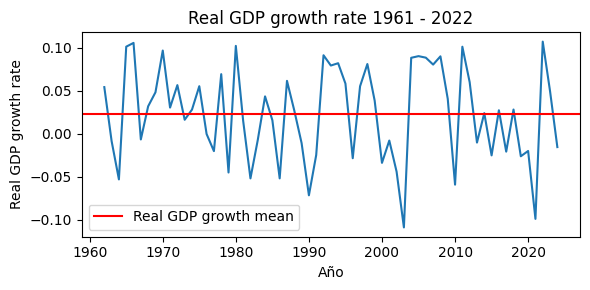

In [8]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(6, 3))
plt.title('Real GDP growth rate 1961 - 2022')
plt.xlabel('Año')
plt.ylabel('Real GDP growth rate')

plt.plot(df_infl_tva['Año'], df_infl_tva['GDP_Real_gr'])

y_line = df_infl_tva['GDP_Real_gr'].mean()

plt.axhline(y=y_line, color='r', linestyle='-', label='Real GDP growth mean')

plt.legend()

plt.tight_layout()
plt.show()

Podemos comprobar que historicamente, el crecimiento del PIB real se ha mantenido en un intervalo de (-0.10, 0.10) con una media de 2.23% y una desviación estandar del 5.51%.

In [9]:
df_infl_tva = df_infl_tva.dropna()

In [10]:
df_infl_tva['Velocity M2_gr'].describe()

count    63.000000
mean      0.007066
std       0.153119
min      -0.271572
25%      -0.086536
50%      -0.013734
75%       0.082141
max       0.677537
Name: Velocity M2_gr, dtype: float64

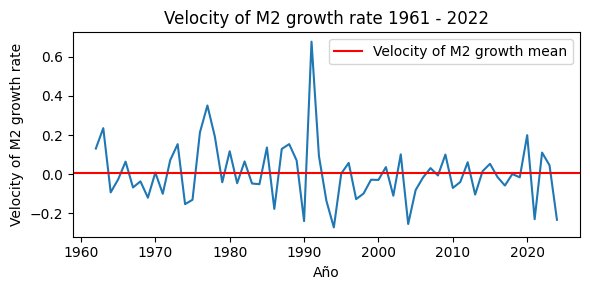

In [14]:
plt.figure(figsize=(6, 3))
plt.title('Velocity of M2 growth rate 1961 - 2022')
plt.xlabel('Año')
plt.ylabel('Velocity of M2 growth rate')

plt.plot(df_infl_tva['Año'], df_infl_tva['Velocity M2_gr'])


y_line = df_infl_tva['Velocity M2_gr'].mean()

plt.axhline(y=y_line, color='r', linestyle='-', label='Velocity of M2 growth mean')

plt.legend()

plt.tight_layout()
plt.show()

Salvo outliers, la velocidad de M2 se ha mantenido a unas tasas de crecimiento en un intervalo constante con una media del 0.71%

#### Analizamos ahora conjuntamente el crecimiento de M2 y la Inflacion

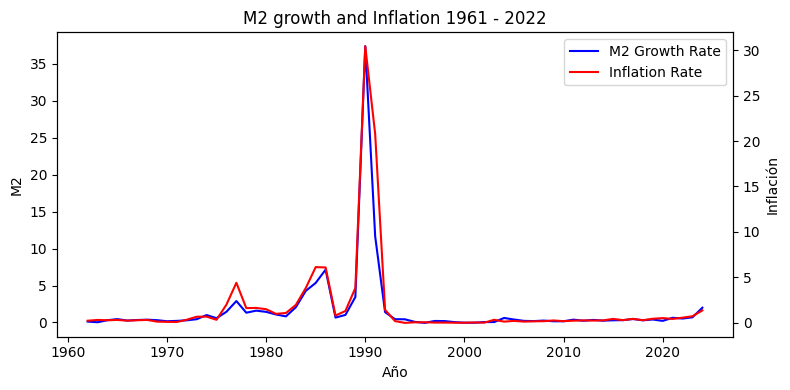

In [18]:
fig, ax1 = plt.subplots(figsize=(8, 4))


ax1.set_title('M2 growth and Inflation 1961 - 2022')
ax1.set_xlabel('Año')
ax1.set_ylabel('M2')
ax1.plot(df_infl_tva['Año'], df_infl_tva['M2_gr'], color='b', label='M2 Growth Rate')


ax2 = ax1.twinx()
ax2.set_ylabel('Inflación')  


ax2.plot(df_infl_tva['Año'], df_infl_tva['Inflation Rate'], color='r', label='Inflation Rate')


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')


fig.tight_layout()
plt.show()


In [50]:
df_infl_tva[['M2_gr', 'Inflation Rate']].describe()

,M2_gr,Inflation Rate
count,63.000000,63.000000
mean,1.596230,1.604749
std,4.952092,4.660917
min,-0.052649,-0.035611
25%,0.218727,0.151588
50%,0.386772,0.288718
75%,1.016798,1.005334
max,37.395430,30.460912


Se puede observar que la media para las dos magnitudes es muy parecida (158.9% vs 177.53%) y mucho mayor que las observadas en el crecimiento del PIB y la velocidad de M2 (2.39% y 13.13% respectivamente). Por lo tanto, el efecto del crecimiento de la oferta monetaria, hace que los efectos que podrían tener las variables GDP_Real y Velocity of M2 sean residuales. Es por ello, que podemos asumir que el crecimiento de esas dos variables ha sido constante a lo largo del tiempo y enfocaremos nuestro analisis en los efectos que ha tenido el crecimiento de la oferta monetaria en la inflación argentina

#### Gráficamos una matriz de correlación para las variables filtradas

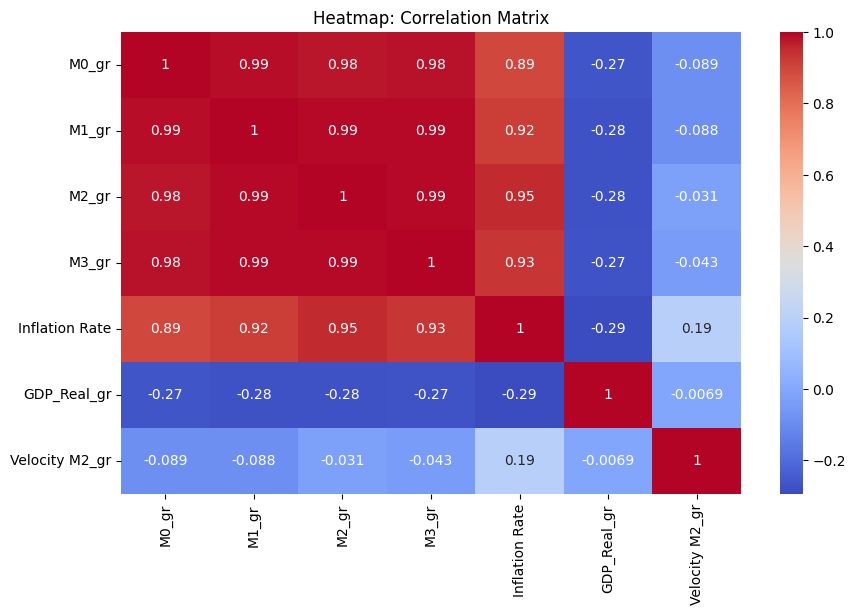

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
# Mapa de calor para las correlaciones entre variables numéricas
numerical_columns = ['M0_gr','M1_gr','M2_gr','M3_gr','Inflation Rate','GDP_Real_gr','Velocity M2_gr']
correlation_matrix = df_infl_tva[numerical_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Matrix')
plt.show()


<!-- Año GDP_gr	CPI_gr	Velocity_M2_gr                             # Realtiva
Año GDP (current LCU)	CPI (2016 = Base Yr)	Velocity of M2 # ABS -->

<!-- df_excel = pd.read_excel('Data_in\GDP_Real_Argentina.xls')
df = df.merge(df_excel, on='Año', how='left') -->